## Estava interessado na Distribuição de séries e filmes da Netflix. Achei um dataset no Kaggle que coordena todos o conteúdo da Netflix(até fevereiro de 2020).Vou analisar algumas teorias sobre a distribuição e preparar os dados para serem útilizados em  um possivel sistema de recomendação.

---


## Importando bibliotecas e Datasets


 Importando bibliotecas que vamos usar
 


In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt


Vamos carregar os dados direito do Kaggle, para isso precisamos utilizar o json deles. Após baixar o arquivo kaggle.json da sua conta Kaggle(É necessario para baixar os dados) siga os passos abaixo para carregar o banco de dados.


In [ ]:
files.upload() #Selecione o arquivo Json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arthurtorresbaio","key":"eb1b7e9073ede268854ec4009a4f4c66"}'}

Criando o diretório.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json



Baixando o dataset diretamente do Kaggle


In [ ]:
!kaggle datasets download -d shivamb/netflix-shows #baixando diretamente do endereço
!unzip /content/netflix-shows.zip #unzip os arquivos


netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/netflix-shows.zip
replace netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: netflix_titles.csv      


Vamos carregar os dados e mostrar os 5 primeiros valores para garantir que não houve um erro ao carregar os dados


In [ ]:
dataNetflix = pd.read_csv("netflix_titles.csv") # carregando o arquivo
dataNetflix.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


##Análise Inicial


Vamos analisar os tipos de dados que temos para ter um norte para trabalhar.


In [ ]:
dataNetflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


Temos a coluna "data_added" que se olharmos no dataset está verbosa. Eu gosto de transformar uma data em três colunas que indicam melhor a informação (dia,mês e ano) além de facilitar a visualização. Utilizando alguns comandos do python, podemos fazer tal operação


In [ ]:
dataNetflix["date_added"] = pd.to_datetime(dataNetflix['date_added']) #transformando em formato para trabalhar.
dataNetflix["year_added"]  =(dataNetflix['date_added'].dt.year)
dataNetflix["month_added"] = (dataNetflix['date_added'].dt.month)
dataNetflix["day_added"] = (dataNetflix["date_added"].dt.day)
dataNetflix = dataNetflix.drop(columns = "date_added")


In [ ]:
#dando uma olhada na nossa modificação
dataNetflix.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,9.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,8.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,8.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,8.0


## Limpeza de Dados


Vamos ver se temos valores nulos no dataset e se forem muito relevantes o que se pode fazer para não perder esse dados.



In [ ]:
dataNetflix.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
release_year       0
rating            10
duration           0
listed_in          0
description        0
year_added        11
month_added       11
day_added         11
dtype: int64

Com uma rápida pesquisa, percebe-se que a maioria dos diretores faltantes(1969!) se refere a séries pois elas não tem um diretor definido para toda a duração da serie.  Vamos substituir esses valores por Desconhecido.Além disso nota-se é que temos 11 linhas sem data na qual foi adicionada. Vamos identificar melhor essas colunas e analisar as 11 linhas para ver se temos algum padrão para a série não ser ter a data que foi adicionada ao catálogo.

In [ ]:

#Vamos trocar os valores Nulos por string's para podemos trabalhar melhor com os dados,
dataNetflix.loc[(dataNetflix["director"].isnull()),"director"] = "Diretor Desconhecido"
dataNetflix.loc[(dataNetflix["country"].isnull()) ,"country"] = "Pais Desconhecido"
dataNetflix.loc[(dataNetflix["cast"].isnull()) ,"cast"] = "Elenco Desconhecido"
dataNetflix.loc[(dataNetflix["rating"].isnull()) ,"rating"] = "Rating Desconhecido"


dataNetflix[dataNetflix.year_added.isna()]



,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
6223,70204989,TV Show,Gunslinger Girl,Diretor Desconhecido,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",NaN,NaN,NaN
6224,70304979,TV Show,Anthony Bourdain: Parts Unknown,Diretor Desconhecido,Anthony Bourdain,United States,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,NaN,NaN,NaN
6225,70153412,TV Show,Frasier,Diretor Desconhecido,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,NaN,NaN,NaN
6226,70243132,TV Show,La Familia P. Luche,Diretor Desconhecido,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN,NaN,NaN
6227,80005756,TV Show,The Adventures of Figaro Pho,Diretor Desconhecido,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",NaN,NaN,NaN
6228,80159925,TV Show,Kikoriki,Diretor Desconhecido,Igor Dmitriev,Pais Desconhecido,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN,NaN,NaN
6229,80000063,TV Show,Red vs. Blue,Diretor Desconhecido,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN,NaN,NaN
6230,70286564,TV Show,Maron,Diretor Desconhecido,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN,NaN,NaN
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Diretor Desconhecido,Elenco Desconhecido,Pais Desconhecido,2016,Rating Desconhecido,60 min,Movies,Nursery rhymes and original music for children...,NaN,NaN,NaN
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Diretor Desconhecido,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN,NaN,NaN


Com uma olhada no dataset vemos que 10 dos 11 são Séries. E que uma delas é Friends, que é bem famosa então não podemos somente retirar tais dados. Utilizei a tática de complementar pela média das tabelas pois não afeta a distribuição .

In [ ]:
dateInformation = ["year_added","month_added","day_added"] 

for date in dateInformation :
  dataNetflix[date] = dataNetflix[date].fillna(dataNetflix[date].mean()).astype(int)
  dataNetflix[date] = dataNetflix[date].map(int)
#vamos analisar os valores nulos agora
dataNetflix.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
day_added       0
dtype: int64

 Boa. Não temos valores nulos no nosso dataset agora. Podemos trabalhar melhor com esses dados.


Com o dataset Completo vamos mudar as colunas para Português para facilitar o entendimento. Vamos também criar uma variável para armazenar este dados, pois usaremos ele no final para criar o dataset auxiliar para o sistema de recomendação. O nome deste dataframe sera dataSisRecom






In [ ]:
dataNetflix.columns=["Id","Tipo","Titulo","Diretor","Elenco",
              "Pais","Ano_Lancamento","Classificação_Indicativa","Duração",
              "Genero","Sinopse","Ano_Netflix","Mês_Netflix","Dia_Netflix"]

                                                    
dataSisRecom = dataNetflix.copy()



##Séries e Filmes tem muitas peculiariedades, vamos dividir o dataset em dois para trabalhar melhor com esses dados.

In [ ]:
dataFilme = dataNetflix[dataNetflix["Tipo"] == "Movie"] # apenas os Filmes
dataSerie = dataNetflix[~(dataNetflix["Tipo"] == "Movie")] # apeans as Series

In [ ]:
#Checagem
print(dataFilme.shape)
print(dataSerie.shape)


(4265, 14)
(1969, 14)


## Vamos trabalhar com filmes primeiros.



Vamos eliminar as colunas Id e Tipo por elas serem redudantes e não trazer nenhuma informação útil para visualização. É importante notar que podemos identificar o filme pelo Titulo


In [ ]:
dataFilmeSimples =dataFilme.drop(columns = "Tipo")
dataFilmeSimples.reset_index(inplace = True)

Sabemos que todos os filmes estão classficiados em minutos, porém identificando esse padrão, pode-se retirar essa informação não util transformando esta coluna em inteiro para podemos ter uma disposição da duração de filmes na Netflix.
Depois vamos visualizar isto com um scatter plot.


In [ ]:
dataFilmeSimples['Duração'] = dataFilmeSimples['Duração'].map(lambda x: x.rstrip('min')).astype(int) 


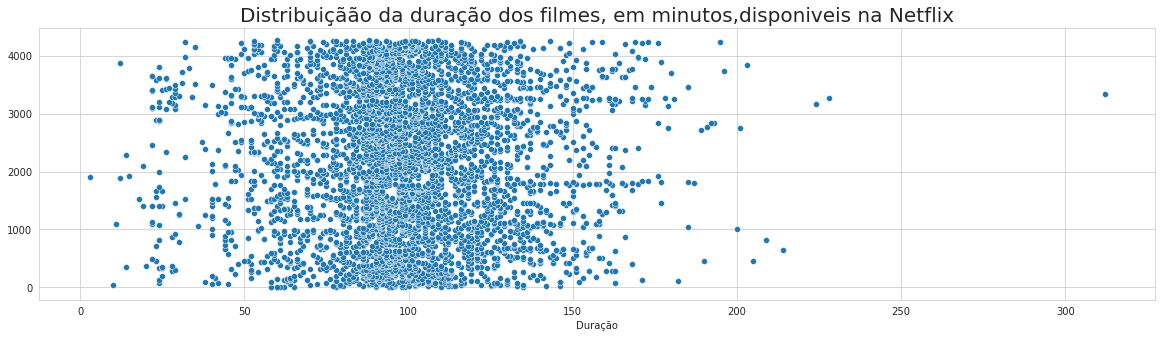

In [ ]:

plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
ax = sns.scatterplot(data =dataFilmeSimples, x="Duração" ,y =dataFilmeSimples.index)
ax.set_title("Distribuiçãão da duração dos filmes, em minutos,disponiveis na Netflix",
             {"fontsize" : 20, "fontweight" : 10});
              

Vemos que temos um filme com 300+ minutos. Um pouco de pesquisa revela que este filme é Bundersnatch. Também percebemos um filme com menos de 5 minutos. Este filme é Silent com uma duração de 3 minutos. Estes filmes podem ser considerados Outlines, pois distoam muito da distribuição esperada.



In [ ]:
dataFilmeSimples[dataFilmeSimples.Duração == dataFilmeSimples.Duração.min()]


,index,Id,Titulo,Diretor,Elenco,Pais,Ano_Lancamento,Classificação_Indicativa,Duração,Genero,Sinopse,Ano_Netflix,Mês_Netflix,Dia_Netflix
1899,2478,70304298,Silent,"Limbert Fabian, Brandon Oldenburg",Elenco Desconhecido,United States,2014,TV-Y7,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019,6,4


A visualição entretanto não dá muita informação sobre a duração dos filmes em geral, sabemos que temos uma concentração entre 100-150 minutos. Vamos classificar os filmes em curta metragem(até 60 minutos) , media metragem(60-120 minutos), e longa-metragem( >120 minutos).




In [ ]:
dataFilmeSimples.tipo_filme ="Valor" #criando a coluna data tipo_Filme
dataFilmeSimples.loc[(dataFilmeSimples["Duração"]<= 60 ),"tipo_filme"] = "Curta_metragem"
dataFilmeSimples.loc[(dataFilmeSimples["Duração"]> 60) & (dataFilmeSimples["Duração"] <=120),
                     "tipo_filme"] = "Media_metragem"
dataFilmeSimples.loc[(dataFilmeSimples["Duração"]> 120 ),"tipo_filme"] = "Longa_metragem"

Vamos ver a distribuição de filmes, esperamos uma grande número de Médias metragem e uma pequena quantidade de curtas e longas metragem

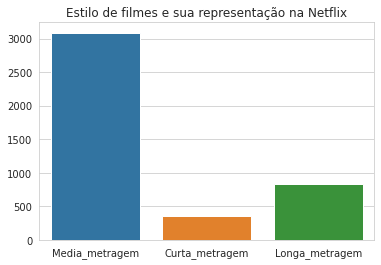

In [ ]:
ax =sns.countplot(data =dataFilmeSimples,x="tipo_filme")
ax.set(xlabel='', ylabel='',title = "Estilo de filmes e sua representação na Netflix")
plt.show()

Vamos criar um função que faz este estilo de gráfico, para agilizar o processamento.


In [ ]:


def graficoFilme(dataset,contador,titulo,eixoX="",eixoY= "") :
  """
  Função recebe um dataset, uma coluna do dataset, o titulo do grafico bem como o titulo
  dos eixos.
  Retorna um grafico com os cinco principais valores presentes nas colunas
  """

  resultado =dataset[contador].str.get_dummies(",").sum().sort_values(ascending=False)[0:5] #pegando os cinco valores
  fig =plt.figure(figsize=(16,8)) #ajuste do grafico
  ax = fig.add_subplot(111)
  fig.subplots_adjust(top=0.90)

  # Título e eixos x e y
  fig.suptitle(titulo, fontsize=16, fontweight='bold')
  ax.set_xlabel(eixoX, fontsize=14, labelpad=20)
  ax.set_ylabel(eixoY, fontsize=14, labelpad=20)
  # Rotacionar os gêneros
  ax.tick_params(rotation=0) 

  sns.barplot(x=resultado.index,
              y=resultado.values,
              
              palette=sns.color_palette("BuGn_r", n_colors=len(resultado) + 4))
  plt.show()


Vamos testar a função com Classificação indicativa.

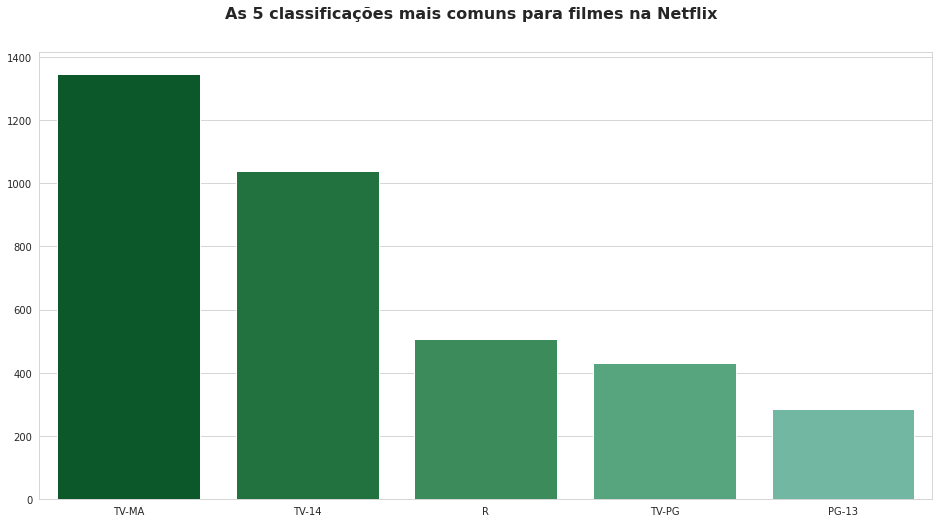

In [ ]:
graficoFilme(dataFilmeSimples,"Classificação_Indicativa","As 5 classificações mais comuns para filmes na Netflix")

             


Vamos trabalhar um pouco com os Gêneros.

Vamos descobrir a sua distribuição dos 5 genêros Para isto vamos usar a função criada acima.


In [ ]:
dataFilmeGenero =dataFilmeSimples.copy() #Copiando o arquivo pra facilitar
dataFilmeGenero.Genero= dataFilmeGenero.Genero.str.replace(", ", ",").str.replace(" ,",",")



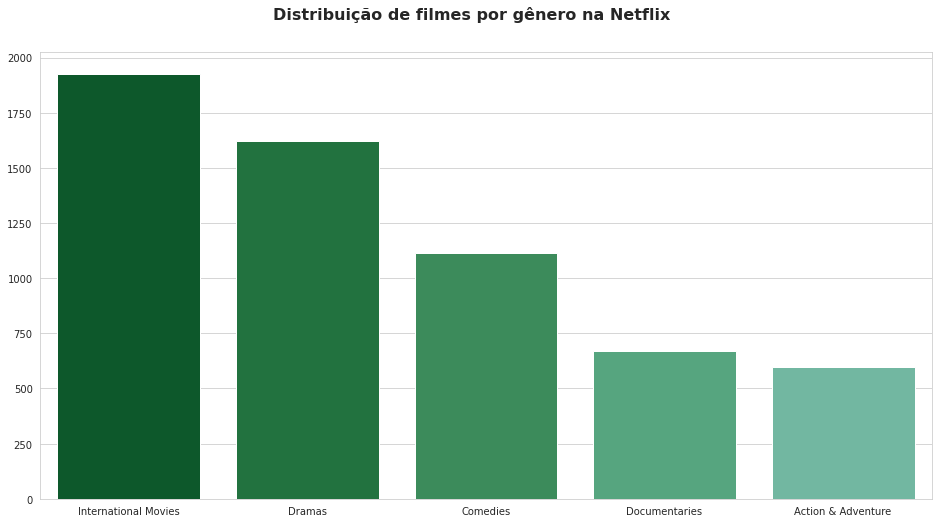

In [ ]:
graficoFilme(dataFilmeGenero,"Genero","Distribuição de filmes por gênero na Netflix")

Para nossa surpresa  o gênero de filme que mais tem na Netflix é de filmes Internacionais. Isto se deve, provavelmente a um filme de Drama de um país não americano ser contado como International e Drama, ele esta sendo contato em duas categorias. Vamos Analisar apenas filmes Internacionais.


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


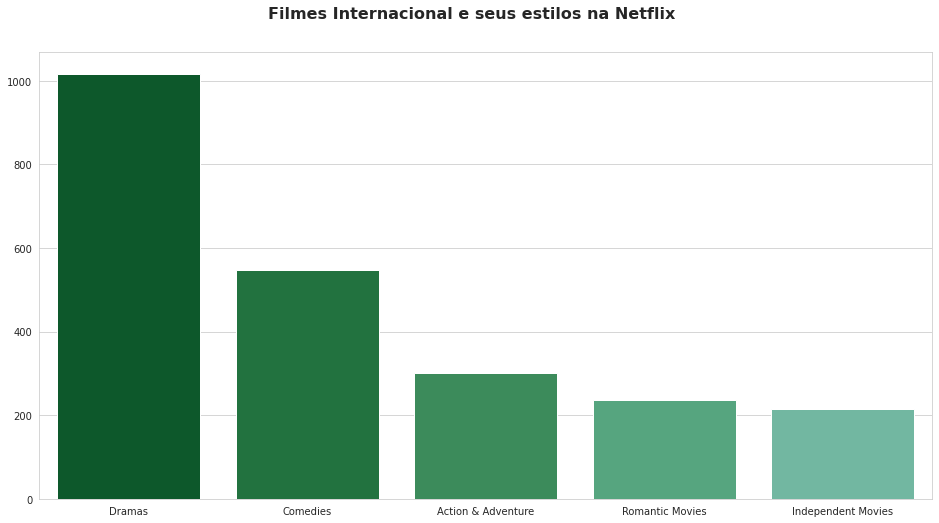

In [ ]:
dataInternacional= dataFilmeGenero[dataFilmeGenero.Genero.str.contains("International Movies")];


dataInternacional.Genero =dataInternacional.Genero.str.replace(",International Movies","").str.replace("International Movies,","");

graficoFilme(dataInternacional,"Genero","Filmes Internacional e seus estilos na Netflix")

Voilá, Analisando apenas filmes Internacionais, percebe-se a maioria de Dramas e Comedias, como esperado. É importante notar que muitos dos filmes internacionais são filmes Indepedentes, o que mostra o suporte que a Netflix dá para este tipo de conteúdo.


#Vamos agora trabalhar com o dataframe de séries.

Vamos primeiro ver o estado do nosso dataframe


In [ ]:

dataSerie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 2 to 6233
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        1969 non-null   int64 
 1   Tipo                      1969 non-null   object
 2   Titulo                    1969 non-null   object
 3   Diretor                   1969 non-null   object
 4   Elenco                    1969 non-null   object
 5   Pais                      1969 non-null   object
 6   Ano_Lancamento            1969 non-null   int64 
 7   Classificação_Indicativa  1969 non-null   object
 8   Duração                   1969 non-null   object
 9   Genero                    1969 non-null   object
 10  Sinopse                   1969 non-null   object
 11  Ano_Netflix               1969 non-null   int64 
 12  Mês_Netflix               1969 non-null   int64 
 13  Dia_Netflix               1969 non-null   int64 
dtypes: int64(5), object(9)
m

Sabemos que o Tipo é igual para todos bem como os diretores, e que Id não é uma informação util, podemos então retirar essas informações do nossa dataset. 
As colunas Gênero,Elenco e País apresenta o mesmo formato do dataset de filmes. Podemos então aplicar ideias usadas em filmes neste dataframe. Vamos tentar.



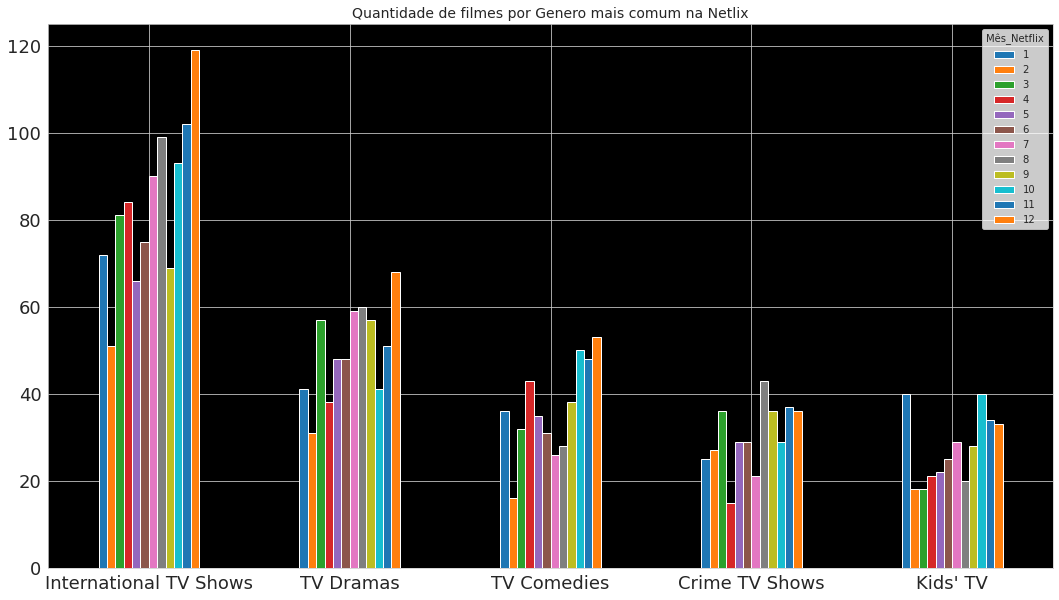

In [ ]:
dataSerieLimpa = dataSerie.drop(columns=["Id","Tipo","Diretor"],axis = 1)

grafBaraTopN(dataSerieLimpa,"Genero","Mês_Netflix")


Não supreendentemente, temos que o genero mais comum são series Internacionais. Uma surpresa que aparece entretanto é uma quantidade significante de serie para crianças(Kids' TV).


Vemos que os gêneros possuem TV e outras palavras que não acrescentam informação na sua descrição , podemos retirar para melhorar nossa visualização. Ademais, podemos fazer isso com a coluna "Duração", retirando a palavra "Season" e transformando para um inteiro

In [ ]:

dataLimpissima = dataSerieLimpa.copy()
dataLimpissima['Duração'] = dataLimpissima['Duração'].map(lambda x: x.rstrip('Seasons')).astype(int)
dataLimpissima["Genero"] = dataLimpissima["Genero"].str.replace(" TV","").str.replace("TV ","").str.replace("'","").str.replace("Shows","")


Vamos testar se nossa classificação deixar mais limpo o gráfico de Gênero x Número de Temporadas

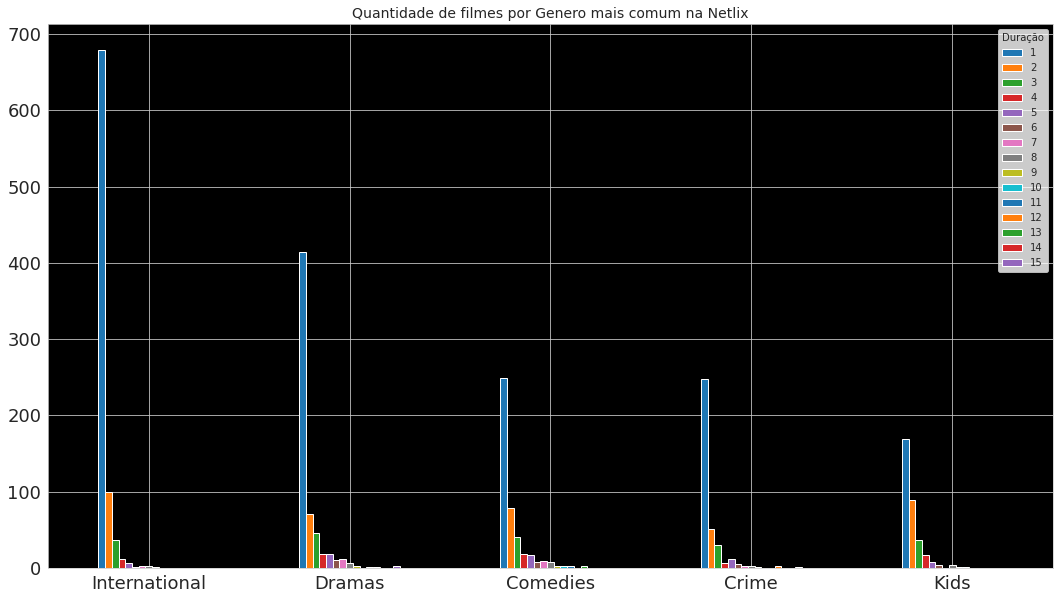

In [ ]:
grafBaraTopN(dataLimpissima,"Genero","Duração",5)

O grafico ficou mais visivel entretanto podemos ver que a nossa legenda tem 15 valores( de uma temporada até 15 temporadas), isto faz com que o grafico não fique muito legivel. Outra coisa a se notar no grafico é que temos uma maioria esmagadora de series com poucas temporadas(1-3) do que o resto. Possiveis explicações são o fracasso de uma serie e que em uma temporada tambem são enquadradas mini-series, o que aumenta consideravelmente o numero de acontecimentos.


#Vamos por fim salvar o dataset original após a limpeza para podemos fazer um sistema de recomendação geral.


In [ ]:
dataSisRecom.to_csv("dataNetflixLimpa.csv", index = False)

In [ ]:
dataNet = pd.read_csv("/content/dataNetflixLimpa.csv")

dataNet.isnull().sum()

Id                          0
Tipo                        0
Titulo                      0
Diretor                     0
Elenco                      0
Pais                        0
Ano_Lancamento              0
Classificação_Indicativa    0
Duração                     0
Genero                      0
Sinopse                     0
Ano_Netflix                 0
Mês_Netflix                 0
Dia_Netflix                 0
dtype: int64